In [39]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt 
import plotly.express as exp 
import chart_studio.plotly as py
# import plotly.graph_objects as go
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.subplots as tls
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")
sb.set_style('darkgrid')

In [40]:
data = pd.read_csv('german_credit_risk.csv').drop(columns='id')
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [42]:
data.isnull().sum().sort_values(ascending = False)

Checking account    394
Saving accounts     183
Age                   0
Sex                   0
Job                   0
Housing               0
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [43]:
data.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
Risk                  2
dtype: int64

In [44]:
df = data.copy()
df['Job_cat'] = df['Job'].map({0: 'unskilled and non-resident',
                                1: 'unskilled and resident',
                                2: 'skilled',
                                3: 'highly skilled'})
df.fillna('None', inplace=True)

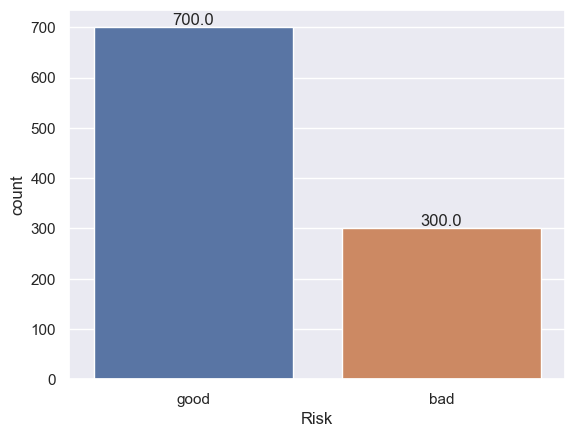

In [45]:
ax = sb.countplot(df, x = df.Risk)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [46]:
# Categorical Variables
categorical_cols = ['Sex', 'Job_cat', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

# Plot bar plots for categorical variables
for col in categorical_cols:
    fig = exp.histogram(df, x=col, text_auto = True,
            title=f"count plot of {col}")
    fig.show()
    # ax = sb.countplot(df, x = df[col])
    # for p in ax.patches:
    #     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
    #                 ha='center', va='center', xytext=(0, 5), textcoords='offset points')
    # plt.xticks(rotation=45)
    # plt.tight_layout()
    # plt.show()

In [47]:
radio_tv = np.sum(data['Credit amount'].loc[data['Purpose'] == 'radio/TV'].values)
education = np.sum(data['Credit amount'].loc[data['Purpose'] == 'education'].values)
furniture = np.sum(data['Credit amount'].loc[data['Purpose'] == 'furniture/equipment'].values)
car = np.sum(data['Credit amount'].loc[data['Purpose'] == 'car'].values)
business = np.sum(data['Credit amount'].loc[data['Purpose'] == 'business'].values)
domestic_app = np.sum(data['Credit amount'].loc[data['Purpose'] == 'domestic appliances'].values)
repairs = np.sum(data['Credit amount'].loc[data['Purpose'] == 'repairs'].values)
vacation_others = np.sum(data['Credit amount'].loc[data['Purpose'] == 'vacation/others'].values)

data_purposes = pd.DataFrame(data=[[radio_tv, education, furniture, car, business, domestic_app, repairs, vacation_others]],
                          columns=data["Purpose"].unique())

print(data_purposes)

df2 = [
    go.Scatterpolar(
        r = [radio_tv, education, furniture,car, business, domestic_app, repairs, vacation_others],
        theta = data['Purpose'].unique().tolist(),
        line = dict(
            color = "#ccff50"
        ),
        mode = 'lines+markers',
        fill='toself',
        marker = dict(
            color = '#8010c7',
            symbol='square',
            size=6
        )
    )
]

layout = go.Layout(
    showlegend = False,
    title= "Credit Distribution by Purpose",
    paper_bgcolor = "rgb(245, 255, 245)"
)

fig = dict(data=df2, layout=layout)
iplot(fig, filename = 'polar/basic')

   radio/TV  education  furniture/equipment      car  business  \
0    696543     169873               555125  1269881    403330   

   domestic appliances  repairs  vacation/others  
0                17976    60018            98512  


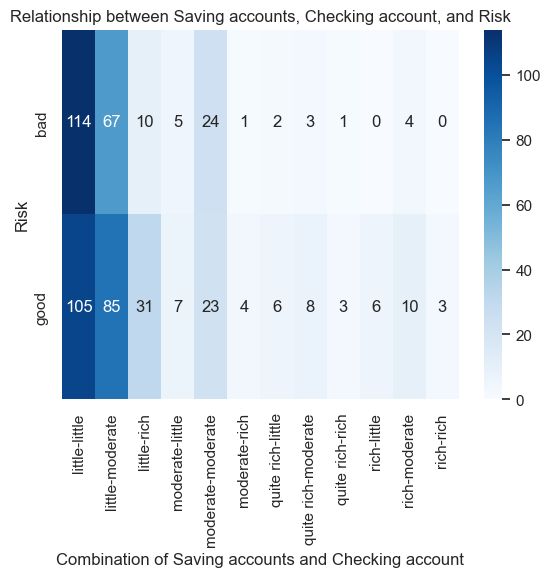

In [48]:
cross_tab = pd.crosstab(data['Risk'], [data['Saving accounts'], data['Checking account']])

sb.heatmap(cross_tab, cmap='Blues', annot=True, fmt='d')

plt.xlabel('Combination of Saving accounts and Checking account')
plt.ylabel('Risk')
plt.title('Relationship between Saving accounts, Checking account, and Risk')

plt.show()


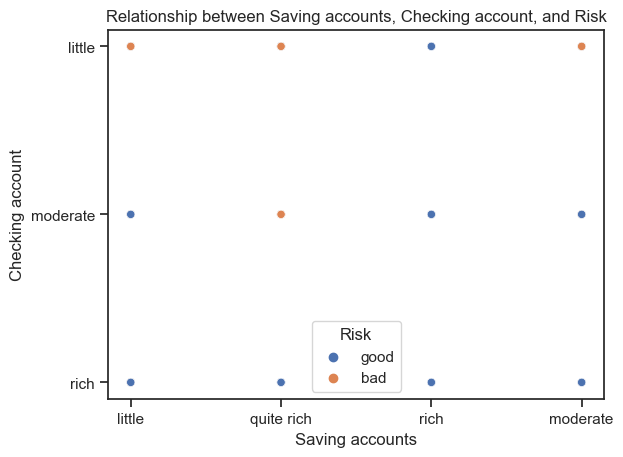

In [49]:
sb.set(style="ticks")

sb.scatterplot(x='Saving accounts', y='Checking account', hue='Risk', data=data)

plt.xlabel('Saving accounts')
plt.ylabel('Checking account')
plt.title('Relationship between Saving accounts, Checking account, and Risk')

plt.show()


In [50]:
# Numeric Variables
numeric_cols = ["Age", "Credit amount", "Duration"]

# Plot histograms and box plots for numeric variables
for col in numeric_cols:
    fig = exp.histogram(df, x = col, marginal='box', title = f'Distribution of {col}')
    fig.show()



In [51]:
df_good = df[df['Risk'] == 'good']
df_bad = df[df['Risk'] == 'bad']

In [52]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Job_cat'],
      dtype='object')

In [53]:
numeric_cols = ['Age', 'Credit amount', 'Duration']
categorical_cols = ['Sex', 'Job_cat', 'Housing', 'Saving accounts',
                    'Checking account', 'Purpose']

In [54]:
for col in numeric_cols:    
    fig = exp.histogram(df, x=col, color='Risk',
                    marginal="box", 
                    hover_data=df.columns )
    fig.update_layout(
        barmode='overlay',
        xaxis_title=col,
        yaxis_title='Count',
        title=f'Distribution of {col} by Risk',
        legend_title='Risk'
    )
    fig.show()

    x = df[col].describe()
    df[col + '_cat'] = pd.cut(df[col], bins=[0, x['25%'], x['50%'], x['75%'], float('inf')], 
                                   labels=[f'<{x["25%"]}', f"{x['25%']}-{x['50%']}", f"{x['50%']}-{x['75%']}", f'>{x["75%"]}'])
    conditional_prob = df.groupby(col + '_cat')['Risk'].value_counts(normalize=True).unstack().reset_index()
    print(conditional_prob)
    fig = exp.bar(conditional_prob, x=col + '_cat', y=['good', 'bad'],
            barmode='group',
            title=f'Conditional Probability of Risk Given {col}')
    fig.show()

Risk    Age_cat       bad      good
0         <27.0  0.367698  0.632302
1     27.0-33.0  0.328889  0.671111
2     33.0-42.0  0.236948  0.763052
3         >42.0  0.255319  0.744681


Risk Credit amount_cat    bad   good
0              <1365.5  0.308  0.692
1        1365.5-2319.5  0.248  0.752
2       2319.5-3972.25  0.224  0.776
3             >3972.25  0.420  0.580


Risk Duration_cat       bad      good
0           <12.0  0.211699  0.788301
1       12.0-18.0  0.299465  0.700535
2       18.0-24.0  0.294643  0.705357
3           >24.0  0.443478  0.556522


In [55]:
for col in categorical_cols:
    cat_counts = df[col].value_counts()
    fig = go.Figure(go.Pie(labels=cat_counts.index, 
                       values=cat_counts))
    fig.update_layout(title = col)
    fig.show()
    
    conditional_prob_sex = df.groupby(col)['Risk'].value_counts(normalize=True).unstack().reset_index()
#     print(conditional_prob_sex)
    fig = exp.bar(conditional_prob_sex, x=col, y=['good', 'bad'],
            barmode='group',
            title=f'Conditional Probability of Risk Given {col}')
    fig.show()

In [56]:
pd.crosstab(df.Purpose, df.Risk).style.background_gradient(cmap = 'viridis')

Risk,bad,good
Purpose,,
business,34,63
car,106,231
domestic appliances,4,8
education,23,36
furniture/equipment,58,123
radio/TV,62,218
repairs,8,14
vacation/others,5,7


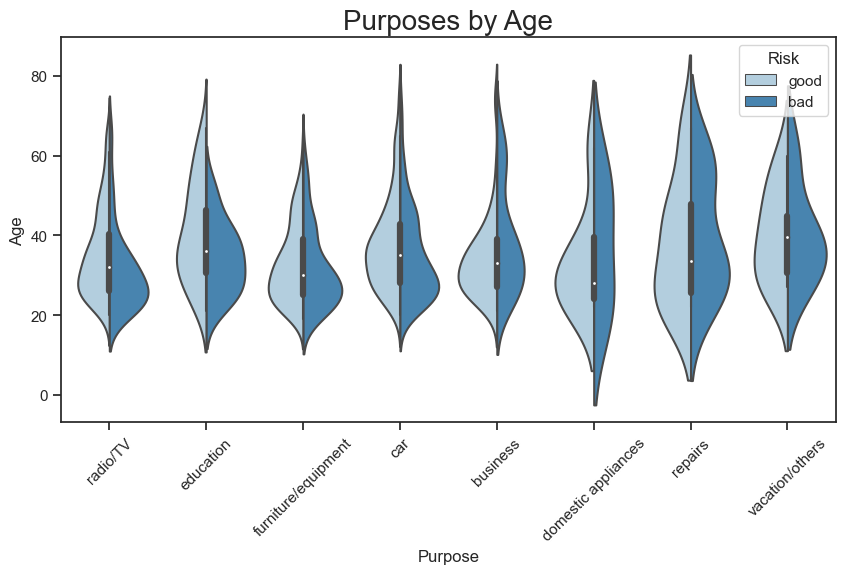

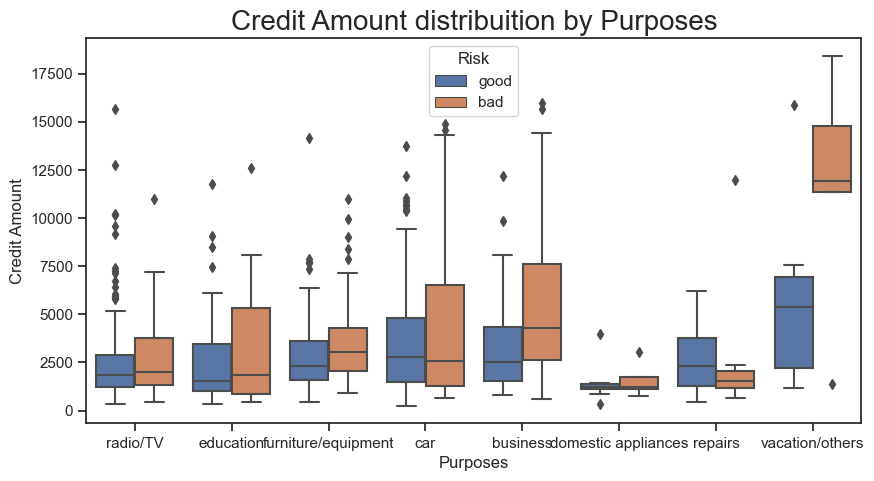

In [57]:
plt.figure(figsize = (10,5))
sb.violinplot(x='Purpose', y='Age', data=df, 
                    palette='Blues', hue = 'Risk',split=True)
plt.xticks(rotation=45)
plt.xlabel('Purpose', fontsize=12)
plt.ylabel('Age', fontsize=12)
plt.title('Purposes by Age', fontsize=20)
plt.show()

plt.figure(figsize = (10,5))
sb.boxplot(x='Purpose', y='Credit amount', data=df, hue = 'Risk')
plt.xlabel('Purposes', fontsize=12)
plt.ylabel('Credit Amount', fontsize=12)
plt.title('Credit Amount distribuition by Purposes', fontsize=20)

plt.show()


In [58]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Job_cat', 'Age_cat',
       'Credit amount_cat', 'Duration_cat'],
      dtype='object')

In [59]:
df_copy = df.copy()

In [60]:
from imblearn.over_sampling import SMOTE

In [61]:
label_encoded_columns = ['Saving accounts', 'Checking account']
onehot_columns = ['Sex', 'Housing', 'Purpose', 'Risk']

In [62]:
label_enc = LabelEncoder()
for i in label_encoded_columns:
    df_copy[f'{i}_enc'] = label_enc.fit_transform(df[i])

onehot_enc = OneHotEncoder(sparse = False)
X = onehot_enc.fit_transform(df_copy[onehot_columns])
df_onehot = pd.DataFrame(X, columns=onehot_enc.get_feature_names_out(onehot_enc.feature_names_in_))
df_copy = pd.concat((df_copy, df_onehot), axis=1)
df_copy

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good
0,67,male,2,own,None,little,1169,6,radio/TV,good,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,49,male,1,own,little,None,2096,12,education,good,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,53,male,2,free,little,little,4870,24,car,bad,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,None,1736,12,furniture/equipment,good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
996,40,male,3,own,little,little,3857,30,car,good,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
997,38,male,2,own,little,None,804,12,radio/TV,good,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
998,23,male,2,free,little,little,1845,45,radio/TV,bad,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [63]:
df_copy['Credit amount by Duration'] = df_copy['Credit amount'] / df_copy['Duration']

In [64]:
df_copy

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk,...,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Risk_bad,Risk_good,Credit amount by Duration
0,67,male,2,own,None,little,1169,6,radio/TV,good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,194.833333
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,123.979167
2,49,male,1,own,little,None,2096,12,education,good,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,174.666667
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,187.666667
4,53,male,2,free,little,little,4870,24,car,bad,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,202.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,None,1736,12,furniture/equipment,good,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,144.666667
996,40,male,3,own,little,little,3857,30,car,good,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,128.566667
997,38,male,2,own,little,None,804,12,radio/TV,good,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,67.000000
998,23,male,2,free,little,little,1845,45,radio/TV,bad,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,41.000000


In [65]:
from sklearn.preprocessing import StandardScaler
to_scale_columns = ['Age', 'Credit amount', 'Credit amount by Duration', 'Duration']

df_copy[to_scale_columns] = np.log1p(df_copy[to_scale_columns])


In [66]:
df_copy.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk', 'Job_cat', 'Age_cat',
       'Credit amount_cat', 'Duration_cat', 'Saving accounts_enc',
       'Checking account_enc', 'Sex_female', 'Sex_male', 'Housing_free',
       'Housing_own', 'Housing_rent', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Risk_bad', 'Risk_good',
       'Credit amount by Duration'],
      dtype='object')

In [67]:
df_selected = df_copy[['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Purpose', 'Risk',
       'Credit amount_cat', 'Saving accounts_enc',
       'Checking account_enc', 'Sex_male', 'Housing_free',
       'Housing_own', 'Housing_rent', 'Purpose_business', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others', 'Risk_good',
       'Credit amount by Duration']]

In [79]:
correlation_matrix = df_selected.corr()

# Get the correlation values with 'risk' column
correlation_with_risk = correlation_matrix['Risk_good']
correlation_with_risk = abs(correlation_with_risk).sort_values(ascending=False)
# Set a threshold for feature selection
threshold = 0.05
  # Adjust this value as per your requirement

# Select features based on the threshold
selected_features = correlation_with_risk[abs(correlation_with_risk) >= threshold].index

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['Risk_good', 'Checking account_enc', 'Housing_own', 'Purpose_radio/TV',
       'Age', 'Housing_rent', 'Housing_free', 'Sex_male',
       'Credit amount by Duration'],
      dtype='object')


In [69]:
df_selected = df_copy[selected_features]
X = df_selected.drop(columns = ['Risk_good'])
y = df_selected['Risk_good']
# scaler = StandardScaler()
# df_selected = pd.DataFrame(scaler.fit_transform(df_selected), columns=[df_selected.columns])


In [70]:
# Create an instance of SMOTE
smote = SMOTE()

# Perform oversampling on the data
X_oversampled, y_oversampled = smote.fit_resample(X, y)

# Convert the oversampled data back to a pandas DataFrame if needed
X_oversampled = pd.DataFrame(X_oversampled, columns=X.columns)
y_oversampled = pd.Series(y_oversampled, name=y.name)
# X_oversampled = X
# y_oversampled = y

In [71]:
seed = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_oversampled, y_oversampled, test_size=0.3, random_state=seed)
print(f"X_train: {X_train.shape}\nX_test: {X_test.shape}")

X_train: (980, 17)
X_test: (420, 17)


In [72]:
models = {
    "LR": LogisticRegression(random_state=seed, max_iter=10000),
    "CART": DecisionTreeClassifier(random_state=seed),
    "NB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "RF": RandomForestClassifier(random_state=seed),
    "SVM": SVC(random_state=seed),
    "XGB": XGBClassifier(),
}

scoring = "recall"
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
scores = []

for name, model in models.items():
    _scores = cross_val_score(model, X_train, y_train,
                              scoring=scoring, cv=kfold, n_jobs=-1)
    msg = f"{name} has an average score of {np.mean(_scores):.3f} ± {np.std(_scores):.3f}"
    print(msg)
    scores.append(_scores)

LR has an average score of 0.573 ± 0.065
CART has an average score of 0.682 ± 0.047
NB has an average score of 0.666 ± 0.065


KNN has an average score of 0.606 ± 0.076
RF has an average score of 0.728 ± 0.049
SVM has an average score of 0.570 ± 0.043
XGB has an average score of 0.731 ± 0.060


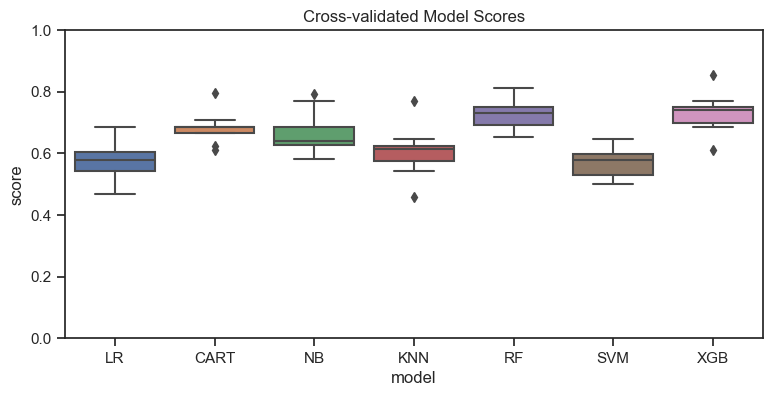

In [73]:
scores_df = pd.DataFrame(data=np.array(scores), index=list(
    models.keys())).reset_index().rename(columns=dict(index="model"))
scores_df = pd.melt(scores_df, id_vars=["model"], value_vars=np.arange(
    0, 10)).rename(columns=dict(variable="fold", value="score"))

plt.figure(figsize=(9, 4))
sb.boxplot(data=scores_df, x="model", y="score")
plt.title("Cross-validated Model Scores")
plt.ylim((0, 1))
plt.show()

In [74]:
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


def metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    return accuracy, precision, recall, f1, roc_auc


def print_metrics(y_true, y_pred):
    accuracy, precision, recall, f1_score, roc_auc = metrics(y_true, y_pred)
    print("Accuracy: %.3f\nPrecision: %.3f\nRecall: %.3f\nF1 Score: %.3f\nROC AUC: %.3f" % (
        accuracy, precision, recall, f1_score, roc_auc))


def plot_curves(y_true, probas):
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    precision, recall, thresholds = precision_recall_curve(y_true, probas)
    plt.plot(recall, precision, color="b")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")

    plt.subplot(122)
    fpr, tpr, tresholds = roc_curve(y_true, probas)
    plt.plot(fpr, tpr, color="g")
    plt.plot([0, 1], [0, 1], color="black", linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.show()


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)



Logistic Regression
Accuracy: 0.636
Precision: 0.670
Recall: 0.587
F1 Score: 0.626
ROC AUC: 0.638


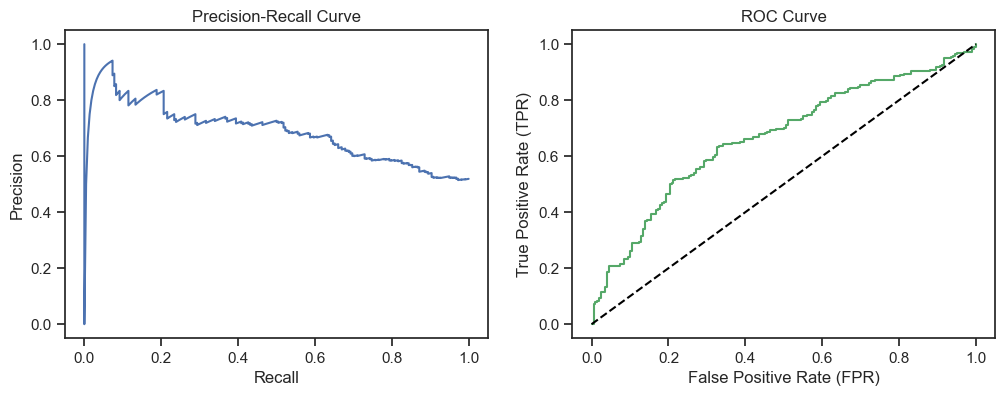


Decision Tree Classifier
Accuracy: 0.679
Precision: 0.729
Recall: 0.606
F1 Score: 0.662
ROC AUC: 0.681


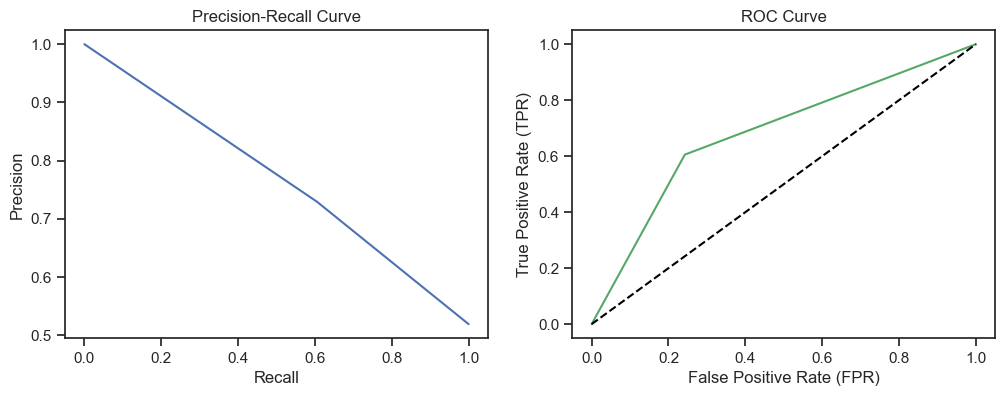


GaussianNB
Accuracy: 0.643
Precision: 0.649
Recall: 0.679
F1 Score: 0.664
ROC AUC: 0.641


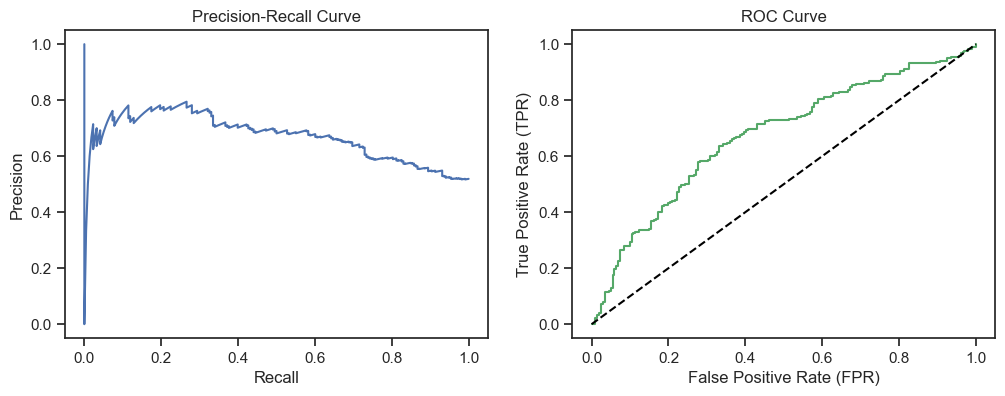


KNN
Accuracy: 0.683
Precision: 0.764
Recall: 0.564
F1 Score: 0.649
ROC AUC: 0.688


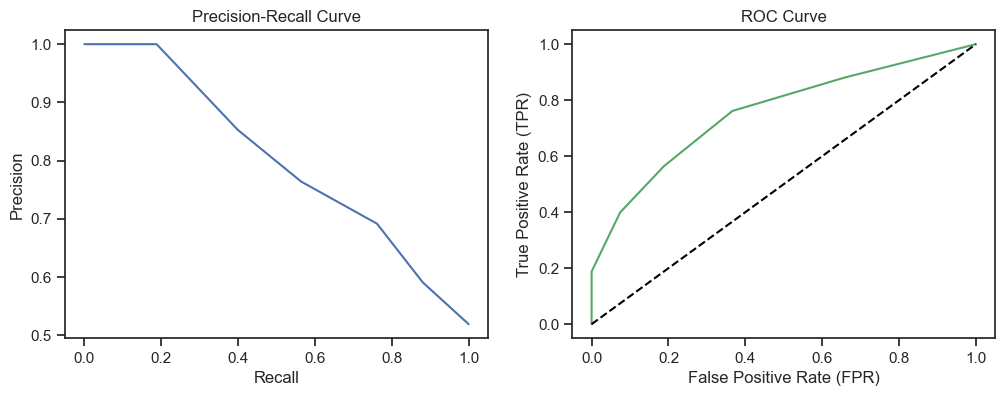


Random Forest Classifier
Accuracy: 0.769
Precision: 0.834
Recall: 0.693
F1 Score: 0.757
ROC AUC: 0.772


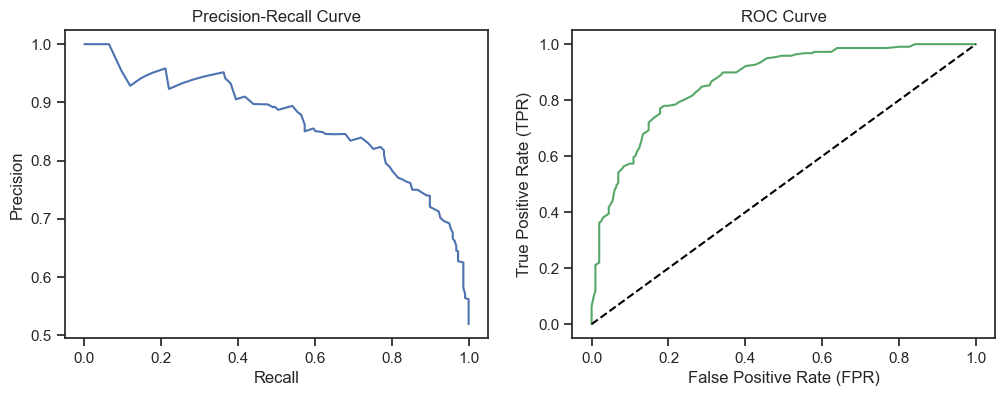


Support Vector Classifier
Accuracy: 0.681
Precision: 0.769
Recall: 0.550
F1 Score: 0.642
ROC AUC: 0.686

XGBoost
Accuracy: 0.776
Precision: 0.830
Recall: 0.716
F1 Score: 0.768
ROC AUC: 0.779


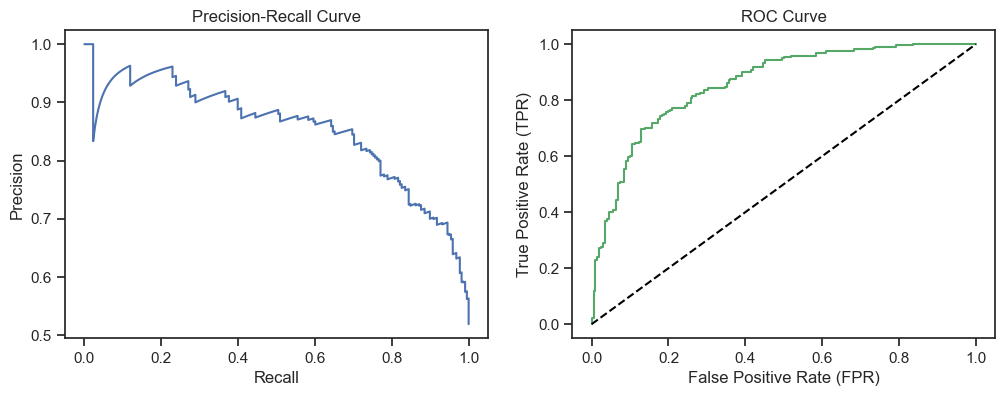

In [75]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "KNN": KNeighborsClassifier(),
    "Random Forest Classifier": RandomForestClassifier(),
    "Support Vector Classifier": SVC(),
    "XGBoost": XGBClassifier(),
}

for name, clf in classifiers.items():
    print(f'\n{name}')
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_metrics(y_test, y_pred)
    if name != 'Support Vector Classifier':
        probas = clf.predict_proba(X_test)
        plot_curves(y_test, probas[:, 1])
    # accuracy = accuracy_score(y_test, y_pred)
    # print(f'{name}: Accuracy = {accuracy:.4f}')